In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score #I have imported silhouette score for calculating silhouette score

In [207]:
def kmeans(X, k,n_init=1000):
    best_centroids=None
    best_labels = None
    best_sse = float('inf')  # positive infinity

    for _ in range(n_init):
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]

        while(True):
            # Assign each data point to the closest centroid
            distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
            labels = np.argmin(distances, axis=0)

            # Update centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

            # Checking for convergence
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        # Calculating SSE for the current initialization
        sse = np.sum((X - centroids[labels]) ** 2)

        # Update the best solution if the current SSE is lower
        if sse < best_sse:
            best_sse = sse
            best_centroids = centroids
            best_labels = labels

    return best_labels, best_centroids, best_sse

In [208]:
def elbow_method(X, max_k):
    sse_values = []

    for k in range(1, max_k + 1):
        _, _, sse = kmeans(X, k)
        sse_values.append(sse)

    # Plot the elbow curve
    plt.plot(range(1, max_k + 1), sse_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

In [209]:
import pandas as pd
df=pd.read_csv('/content/sample_data/Kmean_dataset.csv')
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [210]:
X=df.to_numpy()
X.shape

(178, 13)

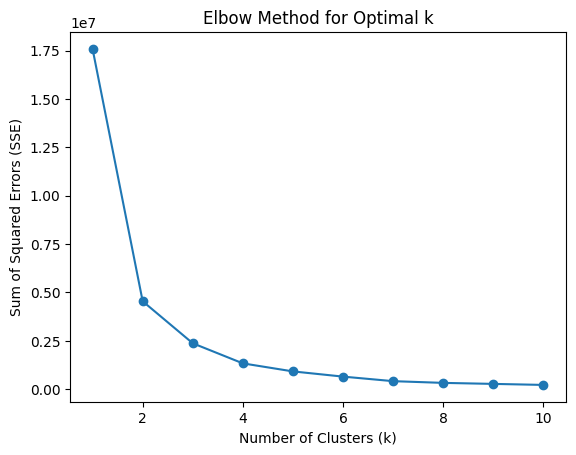

In [211]:
# Elbow Method
max_k_elbow = 10
elbow_method(X, max_k_elbow)

In [212]:
k=3

In [213]:
labels, centroids, sse = kmeans(X, k)
silhouette_score = silhouette_score(X, labels)

In [214]:
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [215]:
centroids

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [216]:
silhouette_score

0.571138193786884